In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [5]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [8]:
import vertica_python
import os

In [9]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [3]:
sns.set_context("poster", font_scale=1.2)

In [32]:
# little a/b test
# score in test are 10% greater than ctrl (per record)
# ctrl has 5x the number of records as test

# 10% lift in test
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10000) * 1.0
ctrl = np.random.binomial(100, p=0.2, size=50000) * 1.0

In [33]:
type(test)

numpy.ndarray

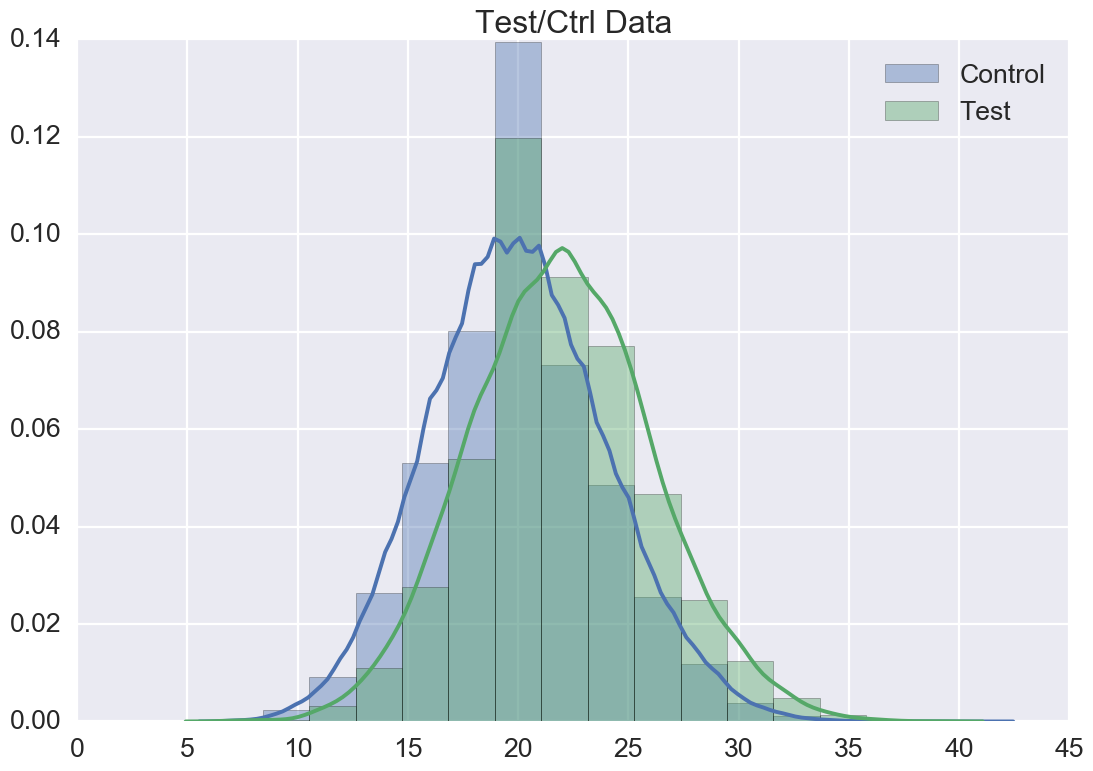

In [34]:
bins = np.linspace(0, 40, 20)

sns.distplot(ctrl, bins=bins, label='Control')
sns.distplot(test, bins=bins, label='Test')
plt.title('Test/Ctrl Data')
plt.legend()

In [35]:
print(bs_compare.percent_change(test.mean(), ctrl.mean()))

9.90783087736


In [37]:
print(bs.bootstrap_ab(test,
                      ctrl,
                      bs_stats.mean,
                      bs_compare.percent_change))

9.90783087736    (9.45926679758, 10.3538490341)


In [38]:
type(np.random.binomial(100, p=0.2 * lift, size=10000) * 1.0)

numpy.ndarray

In [29]:
test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017'].reset_index()['cnt_days_active'].values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 4, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 0, 2,
       1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 6, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 6, 2, 1, 1, 1, 2, 2, 4, 5, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 5, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 4,
       1, 1,

In [40]:
skip_track_selection_df = pd.read_csv('./../Downloads/skip_track_selection_ab_test_python.csv')

In [41]:
skip_track_selection_df = skip_track_selection_df[skip_track_selection_df['pre_3/6']==1]

In [42]:
control = skip_track_selection_df[skip_track_selection_df.variation_name.str.contains('Original')]
test = skip_track_selection_df[skip_track_selection_df.variation_name.str.contains('No Track Selection')]

In [43]:
print(bs_compare.percent_change(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017'].mean(),
                                control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017'].mean()))

pre_3/6                  0.000000
user_id                 -2.435516
is_active               23.531828
is_engaged              -0.640866
cnt_days_active         16.468838
cnt_days_engaged         5.148564
sum_active_activity     -1.601930
sum_engaged_activity    -5.561346
dtype: float64


In [87]:
param_list = test.columns[7:]
course_list = test.course_id.unique()

array(['course-v1:ColumbiaX+CSMM.101x+1T2017',
       'course-v1:ETSx+TOEFLx+1T2017', 'course-v1:HarvardX+CS50+X',
       'course-v1:TsinghuaX+30640014x+1T2016',
       'course-v1:UBCx+Marketing1x+3T2015'], dtype=object)

In [97]:
master_df = pd.DataFrame()

for course in course_list:
    for param in param_list:
        temp_df = pd.DataFrame()
        
        bs.bootstrap_ab(test[test.course_id==course][param].values,
                      control[control.course_id==course][param].values,
                      bs_stats.mean,
                      bs_compare.percent_change)
        
        dist_df = bs._bootstrap_ab_distribution(test[test.course_id==course][param].values,
                      control[control.course_id==course][param].values,
                      bs_stats.mean,
                      bs_compare.percent_difference, test_denominator=None,
                 ctrl_denominator=None, num_iterations=1000,
                 iteration_batch_size=None, scale_test_by=1.0,
                  num_threads=1)
        
        temp_df = pd.DataFrame(dist_df, columns = ['pct_change'])
        temp_df['metric'] = param
        temp_df['course'] = course
        master_df = master_df.append(temp_df)

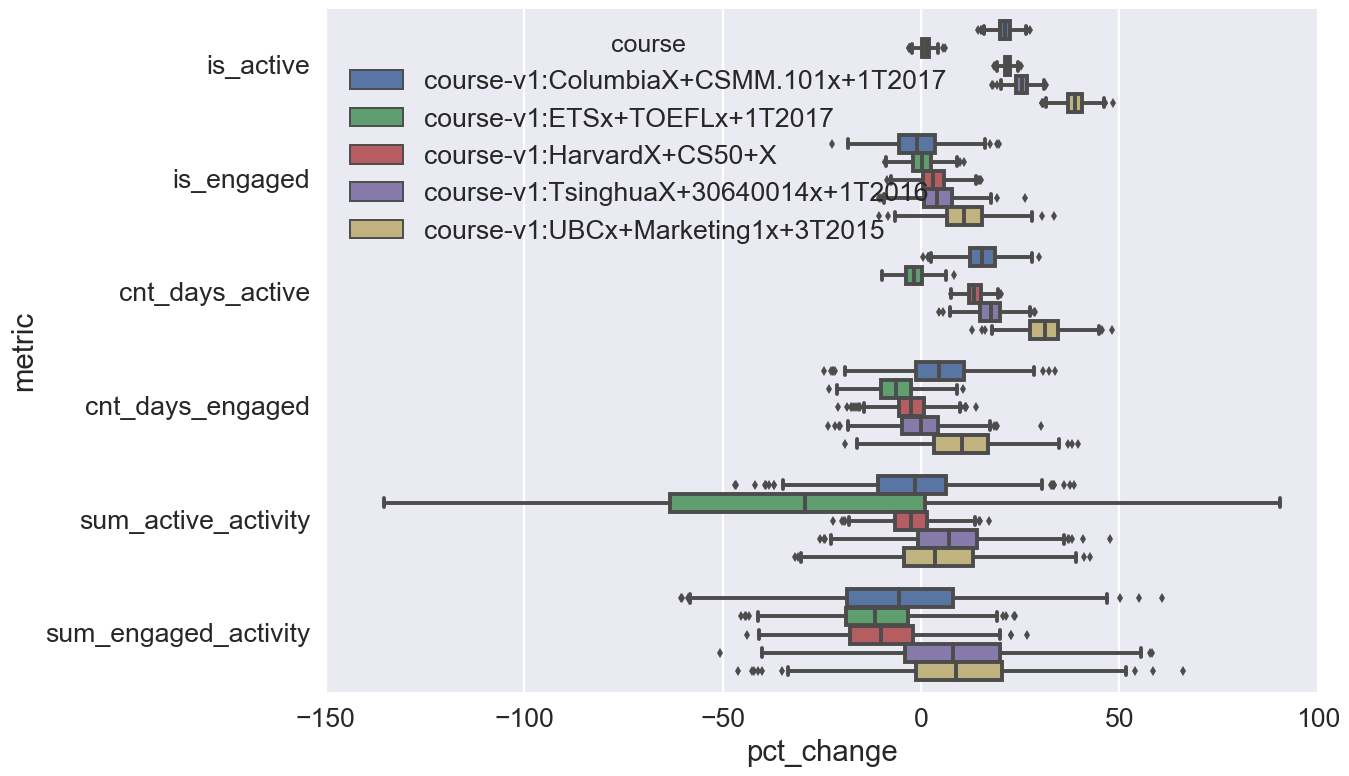

In [134]:
ax = sns.boxplot(y="metric", 
                x="pct_change",
                 hue="course",
                data = master_df,
                orient="h")

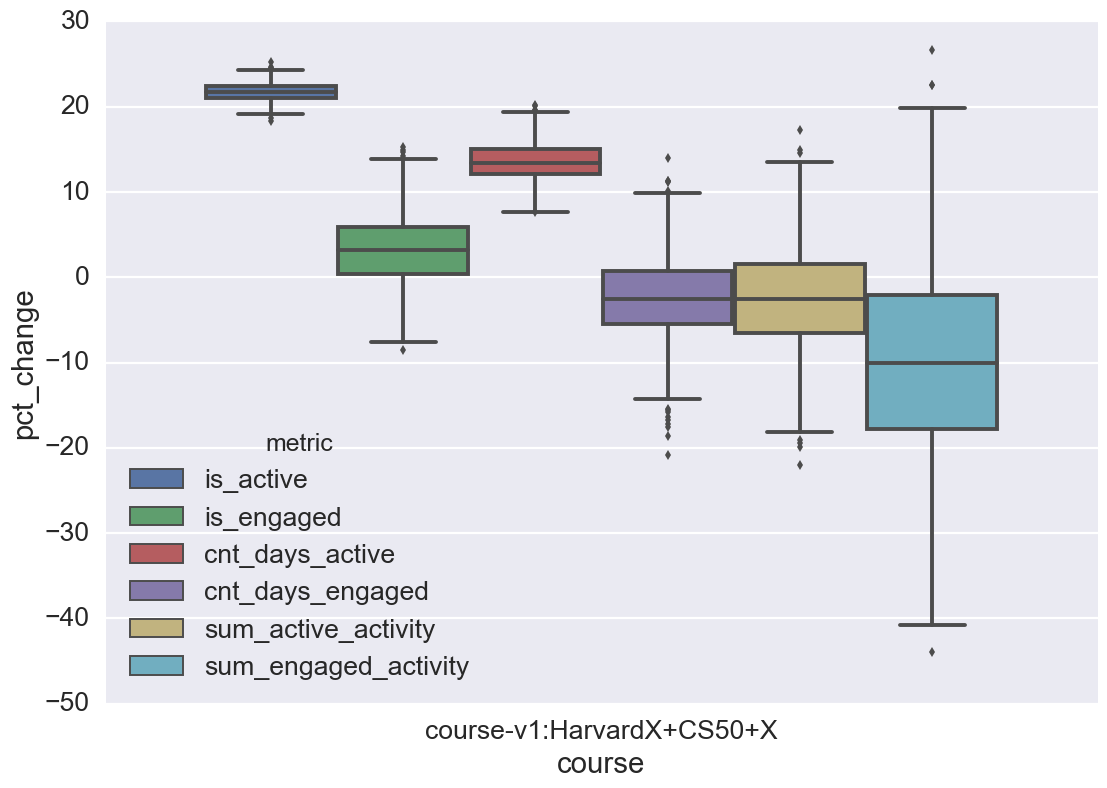

In [109]:


ax = sns.boxplot(x="course", y="pct_change", hue="metric", data = master_df[master_df['course']=='course-v1:HarvardX+CS50+X']
                )


ValueError: Could not interpret input 'pct_change'

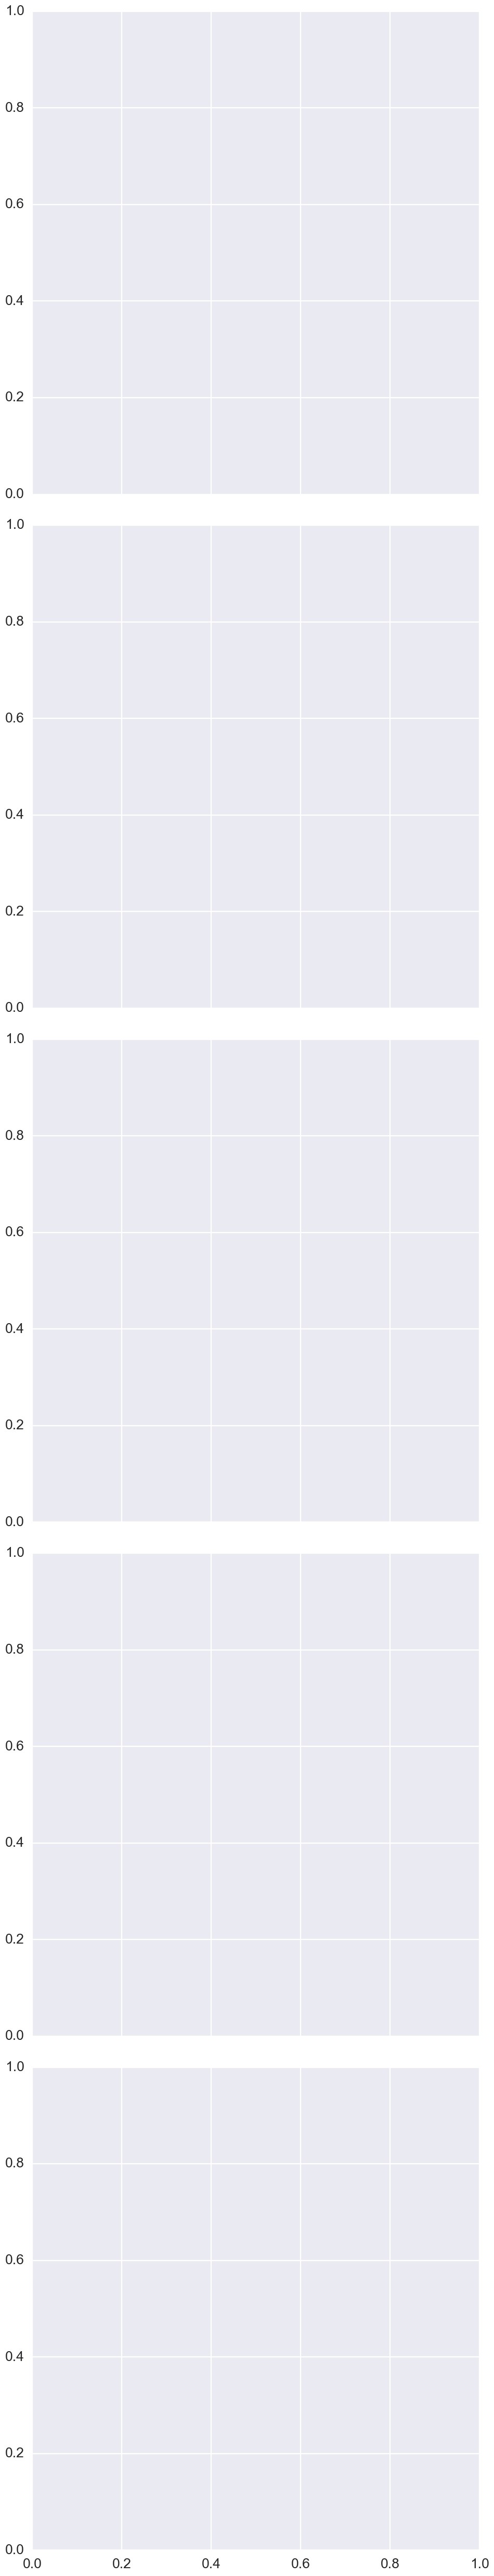

In [123]:
g = sns.FacetGrid(master_df, row="course", size=10)
g.map(sns.boxplot, y="metric", x="pct_change")

In [49]:
print(bs.bootstrap_ab(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      bs_stats.mean,
                      bs_compare.percent_change))

-5.56134614075    (-51.753013894, 24.9831093495)


In [50]:
print(bs.bootstrap_ab(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      bs_stats.mean,
                      bs_compare.percent_difference))

-5.72041209951    (-44.9873646916, 33.1561648514)


In [69]:
test_output_dist_10 = bs._bootstrap_ab_distribution(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      bs_stats.mean,
                      bs_compare.percent_difference, test_denominator=None,
                 ctrl_denominator=None, num_iterations=10,
                 iteration_batch_size=None, scale_test_by=1.0,
                  num_threads=1)
test_output_dist_100 = bs._bootstrap_ab_distribution(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      bs_stats.mean,
                      bs_compare.percent_difference, test_denominator=None,
                 ctrl_denominator=None, num_iterations=100,
                 iteration_batch_size=None, scale_test_by=1.0,
                  num_threads=1)
test_output_dist_1000 = bs._bootstrap_ab_distribution(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      bs_stats.mean,
                      bs_compare.percent_difference, test_denominator=None,
                 ctrl_denominator=None, num_iterations=1000,
                 iteration_batch_size=None, scale_test_by=1.0,
                  num_threads=1)
test_output_dist_10000 = bs._bootstrap_ab_distribution(test[test.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      control[control.course_id=='course-v1:ColumbiaX+CSMM.101x+1T2017']['sum_engaged_activity'].values,
                      bs_stats.mean,
                      bs_compare.percent_difference, test_denominator=None,
                 ctrl_denominator=None, num_iterations=10000,
                 iteration_batch_size=None, scale_test_by=1.0,
                  num_threads=1)

In [94]:
temp_df = pd.DataFrame(test_output_dist_10, columns = ['pct_change'])
temp_df['metric'] = param
master_df = master_df.append(temp_df)

,test
0,8.022488
1,-12.463807
2,14.190488
3,-16.601123
4,-3.691680
5,-9.741090
6,-45.007461
7,-2.152224
8,5.861718
9,-0.266149


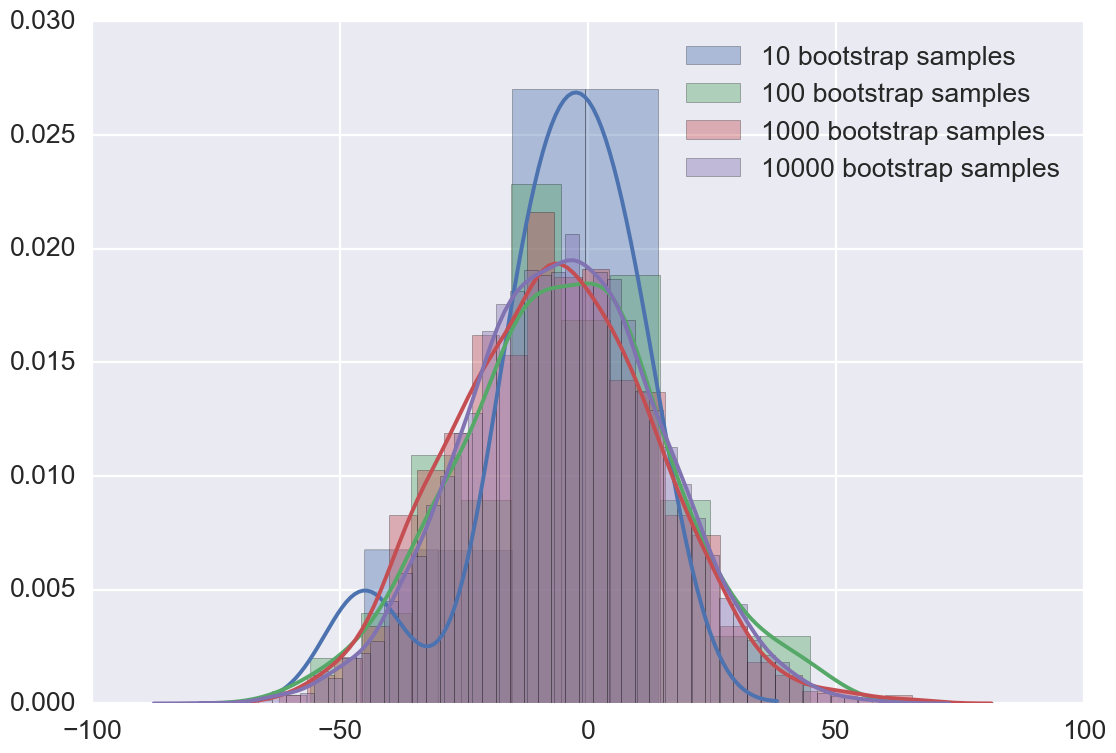

In [73]:
sns.distplot(test_output_dist_10, label='10 bootstrap samples')
sns.distplot(test_output_dist_100, label='100 bootstrap samples')
sns.distplot(test_output_dist_1000, label='1000 bootstrap samples')
sns.distplot(test_output_dist_10000, label='10000 bootstrap samples')
plt.legend()